In [1]:
import json
import pandas as pd
from matplotlib import pyplot as plt
import qtconsole

In [2]:
size_ratio = [2, 4, 6, 8, 10]

In [3]:
def analyze_size_ratio(index_name, row_num, size_ratio):
    block_ids = range(1, row_num+1)
    file_names = []
    for size in size_ratio:
        file_names.append("./size_ratio/size_ratio-%s-10000k-fan6-ratio%s-mem450000-ts.json" % (index_name, size))
    data = {}
    cnt = 0
    for file_name in file_names:
        column = []
        with open(file_name) as f:
            lines = f.readlines()
            for line in lines:
                line = line.strip()
                js_obj = json.loads(line)
                elapse = js_obj["elapse"] / 1000 #us
                column.append(elapse)
        data[size_ratio[cnt]] = column
        cnt += 1
    df = pd.DataFrame(data, index=block_ids)
    return df

In [4]:
def read_storage_size(index_name, size_ratio):
    file_names = []
    for size in size_ratio:
        file_names.append("./size_ratio/size_ratio-%s-10000k-fan6-ratio%s-mem450000-storage.json" % (index_name, size))
    data = {}
    cnt = 0
    for file_name in file_names:
        with open(file_name) as f:
            line = f.readlines()[0]
            js_obj = json.loads(line)
            size = js_obj["total_size"]
            data[size_ratio[cnt]] = [size]
        cnt += 1
    df = pd.DataFrame(data)
    return df

In [5]:
storage = read_storage_size("cole", size_ratio)
print(storage)
storage2 = read_storage_size("cole_plus_archive", size_ratio)
print(storage2)

           2           4           6           8           10
0  1500840447  1499976187  1497018875  1498218999  1498794617
          2          4          6          8          10
0  655086079  684368379  715641339  685613559  755055225


In [6]:
df = analyze_size_ratio("cole", 100000, size_ratio)

[]

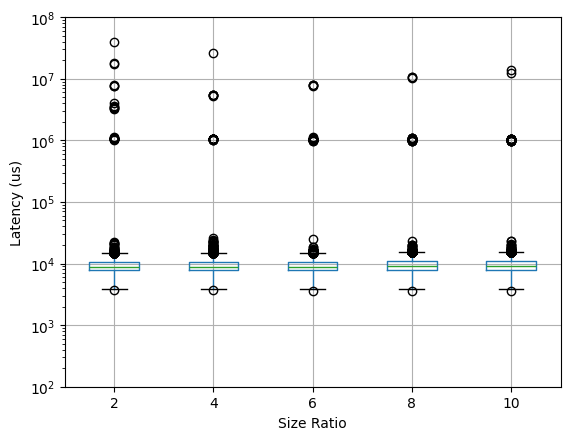

In [7]:
boxplot = df.boxplot(column=[2, 4, 6, 8, 10])
boxplot.set_ylabel('Latency (us)')
boxplot.set_xlabel('Size Ratio')
boxplot.set_yscale('log')
boxplot.set_ylim((100, 1e8))
boxplot.plot()

In [8]:
df.mean()

2     10557.327732
4     10022.131474
6      9906.660486
8     10038.283418
10    10002.349925
dtype: float64

In [9]:
throughput = 100 * 1000000 / df
throughput.mean()

2     11324.387063
4     11222.507491
6     11160.246494
8     11028.698848
10    11039.309618
dtype: float64

In [10]:
df2 = analyze_size_ratio("cole_plus_archive", 100000, size_ratio)

In [11]:
boxplot2 = df2.boxplot(column=[2, 4, 6, 8, 10])
boxplot2.set_ylabel('Latency (us)')
boxplot2.set_xlabel('Size Ratio')
boxplot2.set_yscale('log')
boxplot2.set_ylim((100, 1e8))
boxplot2.plot()

[]